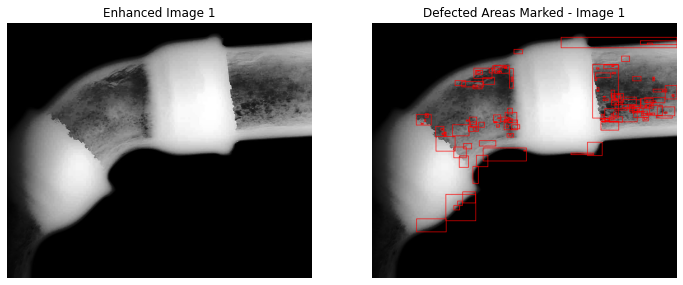

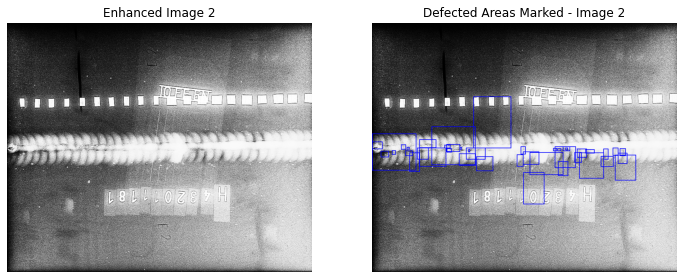

In [3]:
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Function to detect and draw rectangles for the first image
def identify_and_mark_defects_image1(image_path, min_area=10, min_perimeter=0):

    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Improve contrast using histogram equalization
    contrast_img = cv2.equalizeHist(img)

    # Perform edge detection using Canny algorithm
    detected_edges = cv2.Canny(contrast_img, 50, 150)

    # Identify contours
    contours, _ = cv2.findContours(detected_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out contours based on specified area and perimeter thresholds
    selected_contours = [c for c in contours if cv2.contourArea(c) > min_area and cv2.arcLength(c, True) > min_perimeter]

    # Convert the image to RGB format for drawing
    pil_img = Image.fromarray(cv2.cvtColor(contrast_img, cv2.COLOR_GRAY2RGB))
    draw = ImageDraw.Draw(pil_img)

    # Draw rectangles around the detected regions
    for cnt in selected_contours:
        x, y, w, h = cv2.boundingRect(cnt)
        draw.rectangle([x, y, x + w, y + h], outline="red", width=2)

    # Save the marked image
    output_path = 'final_image1.png'
    pil_img.save(output_path)

    # Visualize the results using Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(contrast_img, cmap='gray')
    axes[0].set_title('Enhanced Image 1')
    axes[0].axis('off')
    axes[1].imshow(pil_img)
    axes[1].set_title('Defected Areas Marked - Image 1')
    axes[1].axis('off')
    plt.show()

# Function to detect and draw rectangles for the second image
def identify_and_mark_defects_image2(image_path, min_area=15, min_perimeter=15):

    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    # Improve contrast using histogram equalization
    contrast_img = cv2.equalizeHist(img)

    # Perform edge detection using Canny algorithm
    detected_edges = cv2.Canny(contrast_img, 50, 150)

    # Identify contours
    contours, _ = cv2.findContours(detected_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Convert to RGB format for drawing
    pil_img = Image.fromarray(cv2.cvtColor(contrast_img, cv2.COLOR_GRAY2RGB))
    draw = ImageDraw.Draw(pil_img)

    # Get the image height for filtering
    img_height = contrast_img.shape[0]

    # Draw rectangles around the detected regions
    for cnt in contours:
        if cv2.contourArea(cnt) > min_area and cv2.arcLength(cnt, True) > min_perimeter:
            x, y, w, h = cv2.boundingRect(cnt)
            # Ensure the rectangle is near the center horizontal line
            if img_height / 2 - h < y < img_height / 2 + h:
                draw.rectangle([x, y, x + w, y + h], outline="blue", width=2)

    # Save the marked image
    output_path = 'final_image2.png'
    pil_img.save(output_path)

    # Visualize the results using Matplotlib
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(contrast_img, cmap='gray')
    axes[0].set_title('Enhanced Image 2')
    axes[0].axis('off')
    axes[1].imshow(pil_img)
    axes[1].set_title('Defected Areas Marked - Image 2')
    axes[1].axis('off')
    plt.show()

# Paths to input images
img_path1 = 'pipe.JPG'
img_path2 = 'weld.JPG'

# Process and visualize the first image
identify_and_mark_defects_image1(img_path1)

# Process and visualize the second image
identify_and_mark_defects_image2(img_path2)